Deep Learning for House price prediction
   Our goal is to create an accurate deep learning model that can estimate the house prices for the given data.

In [498]:
'''Price: The price of the house.
Area: The total area of the house in square feet.
Bedrooms: The number of bedrooms in the house.
Bathrooms: The number of bathrooms in the house.
Stories: The number of stories in the house.
Mainroad: Whether the house is connected to the main road (Yes/No).
Guestroom: Whether the house has a guest room (Yes/No).
Basement: Whether the house has a basement (Yes/No).
Hot water heating: Whether the house has a hot water heating system (Yes/No).
Airconditioning: Whether the house has an air conditioning system (Yes/No).
Parking: The number of parking spaces available within the house.
Prefarea: Whether the house is located in a preferred area (Yes/No).
Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished)'''

'Price: The price of the house.\nArea: The total area of the house in square feet.\nBedrooms: The number of bedrooms in the house.\nBathrooms: The number of bathrooms in the house.\nStories: The number of stories in the house.\nMainroad: Whether the house is connected to the main road (Yes/No).\nGuestroom: Whether the house has a guest room (Yes/No).\nBasement: Whether the house has a basement (Yes/No).\nHot water heating: Whether the house has a hot water heating system (Yes/No).\nAirconditioning: Whether the house has an air conditioning system (Yes/No).\nParking: The number of parking spaces available within the house.\nPrefarea: Whether the house is located in a preferred area (Yes/No).\nFurnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished)'

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

EXPLORATORY DATA ANALYSIS

In [500]:
#load the data
data = pd.read_csv(r"D:\kaggle datasets 2\houses\Housing.csv")
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [501]:
pd.set_option('display.max_columns', None)
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [502]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [503]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [504]:
print(data.isnull().sum())
#perfect data

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [505]:
print(data.shape)

(545, 13)


In [506]:
print(data.drop_duplicates().shape[0])  #prints total number of unique rows
print(data.drop_duplicates().shape[1])  #prints total number of unique columns 

545
13


All rows and columns are unique, has no any duplicates and no any null values.

In [507]:
numerical_column = ['price','area','bedrooms','bathrooms','stories','parking']
categorical_column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

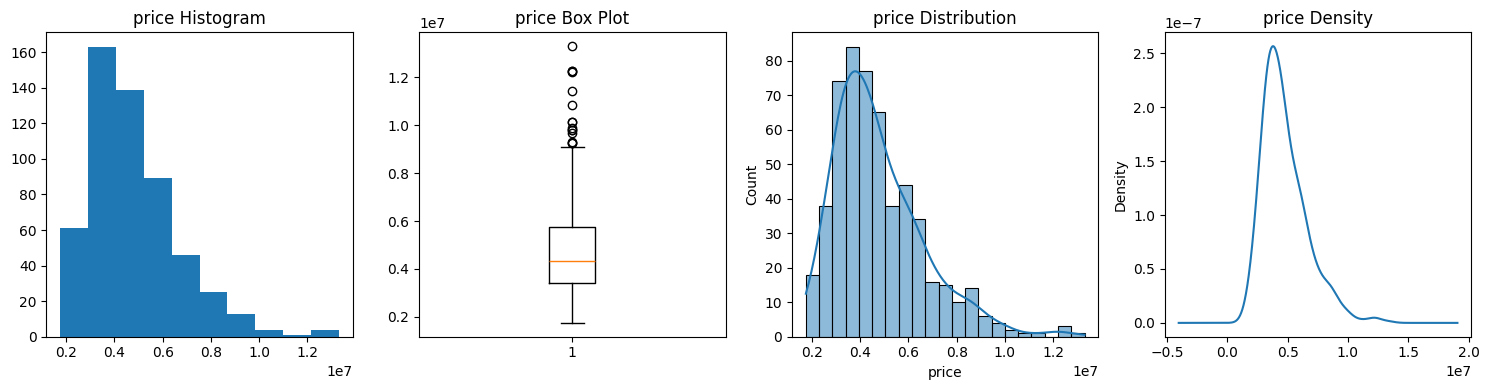

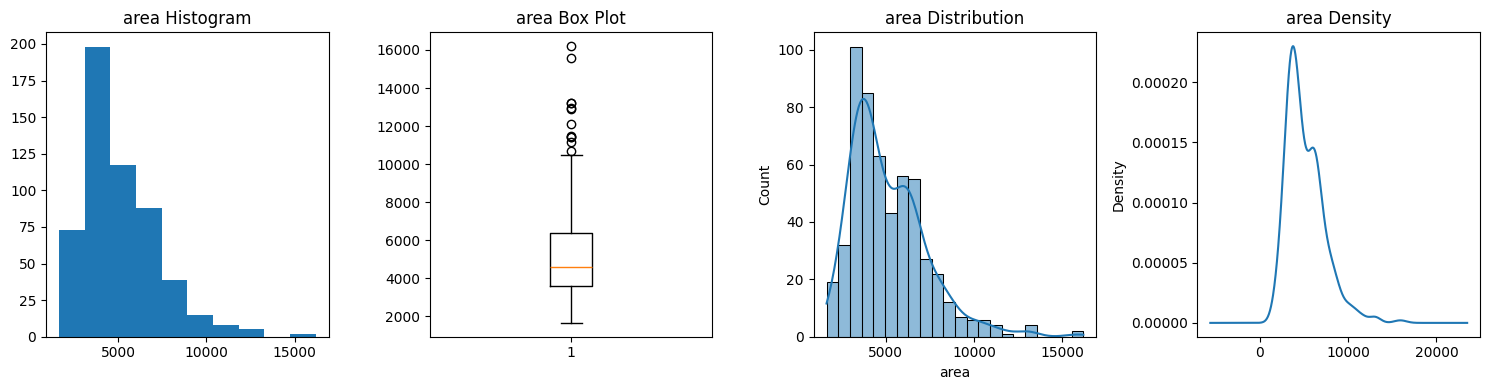

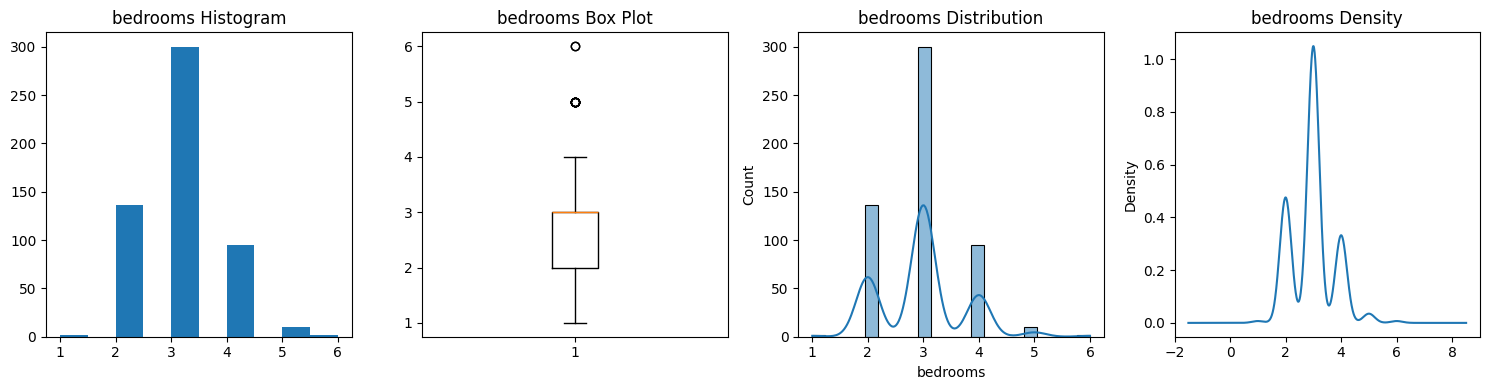

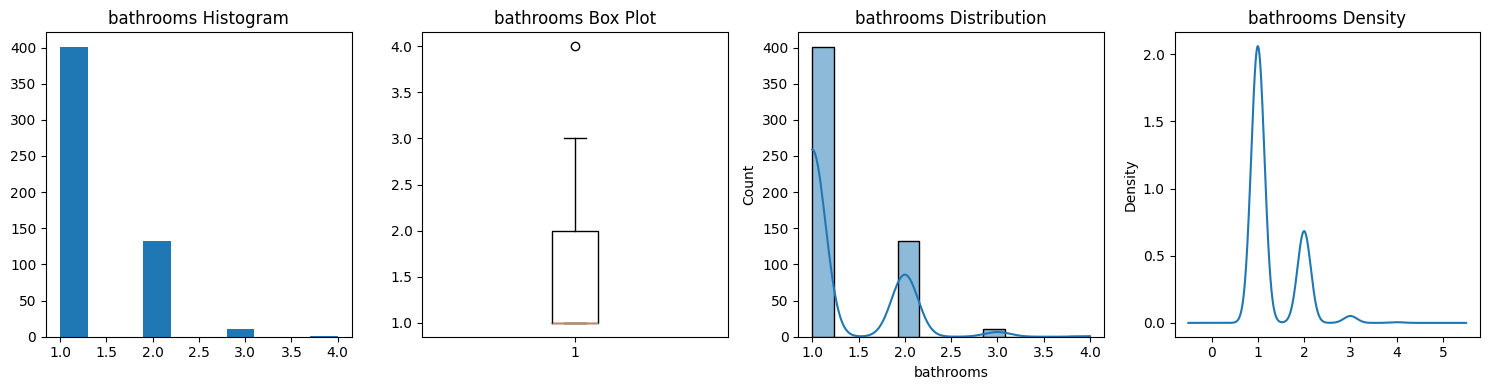

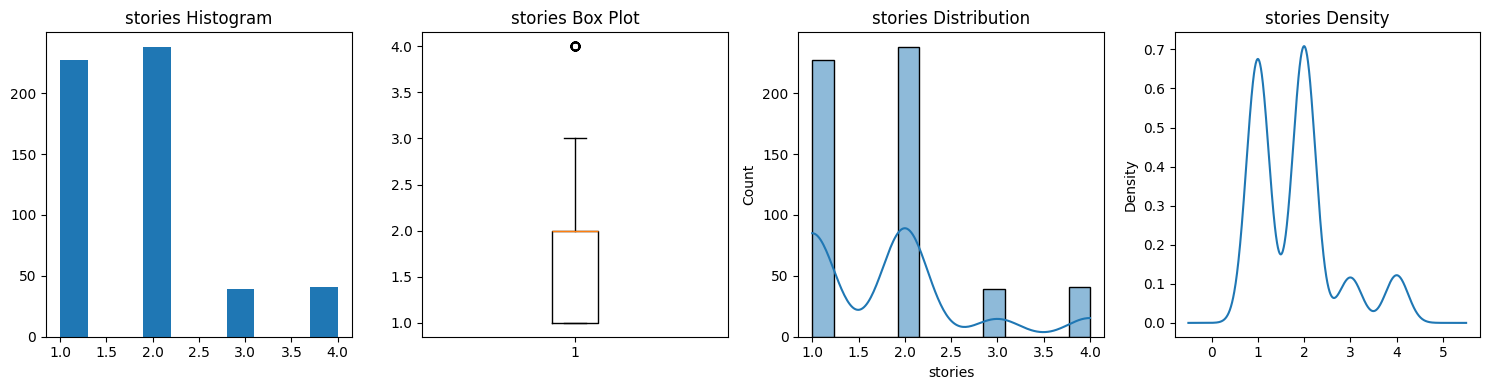

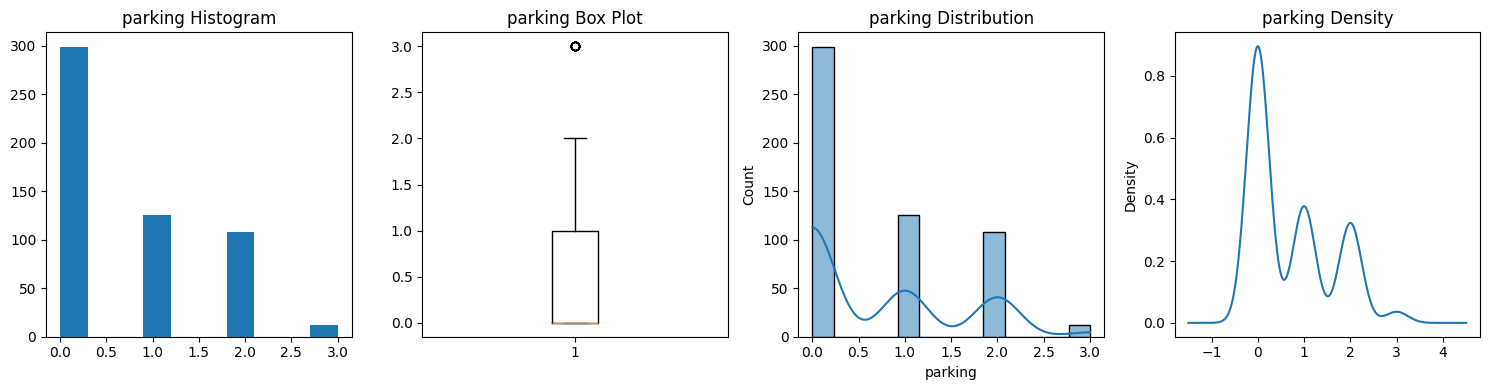

In [508]:
# Choose column to plot
#column = 'price', 'area', 'parking'...

for column in numerical_column:
    plt.figure(figsize=(15,4))
    
    # Histogram
    plt.subplot(1,4,1)
    plt.hist(data[column])
    plt.title(f'{column} Histogram')
    
    # Box Plot
    plt.subplot(1,4,2)
    plt.boxplot(data[column])
    plt.title(f'{column} Box Plot')
    
    # Distribution Plot
    plt.subplot(1,4,3)
    sns.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
    
    # Density Plot
    plt.subplot(1,4,4)
    data[column].plot(kind='density')
    plt.title(f'{column} Density')
    
    plt.tight_layout()
    plt.show()

Looking at this Price Box Plot, here's what each part means:
The Box (Rectangle)

Bottom edge: 25th percentile (Q1) - 25% of prices are below this line
Middle line: Median (50th percentile) - half the prices are above/below this
Top edge: 75th percentile (Q3) - 75% of prices are below this line
Box height: Shows the "middle 50%" of your data (Interquartile Range)

The Whiskers (Lines extending from box)

Bottom whisker: Extends to the lowest price within 1.5 × IQR below Q1
Top whisker: Extends to the highest price within 1.5 × IQR above Q3
Purpose: Shows the "normal" range of your data

The Circles (○) Above

These are OUTLIERS: Unusually high prices
Any price beyond the whiskers gets plotted as individual points
In your case: Several properties have extremely high prices compared to most

What This Tells You:

Most houses are priced between ~2-6 million (the box)
Typical price is around 4-5 million (median line)
Several expensive outliers exist (12+ million range)
Price distribution is right-skewed (more expensive outliers than cheap ones)
Data spread: Prices vary quite a bit, with some luxury properties

Scale Note:

Y-axis shows "1e7" meaning multiply by 10,000,000
So "1.2" actually means 12,000,000 (12 million)

This plot quickly shows you have mostly moderate-priced properties with a few very expensive ones pulling the distribution upward.

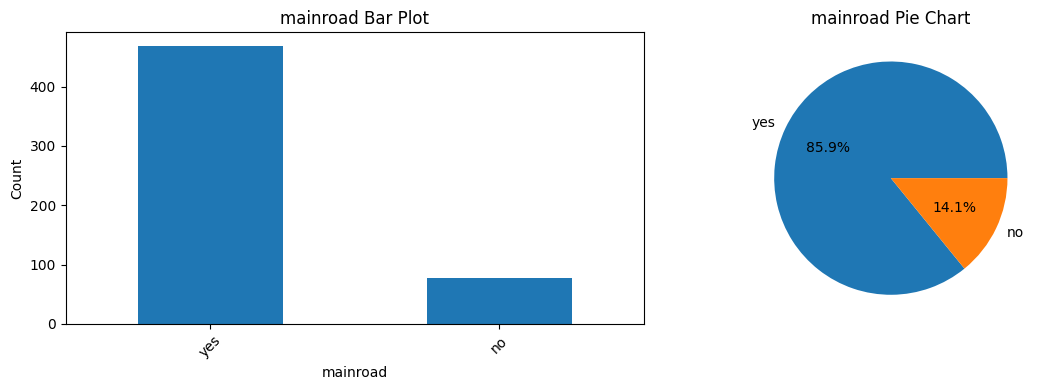

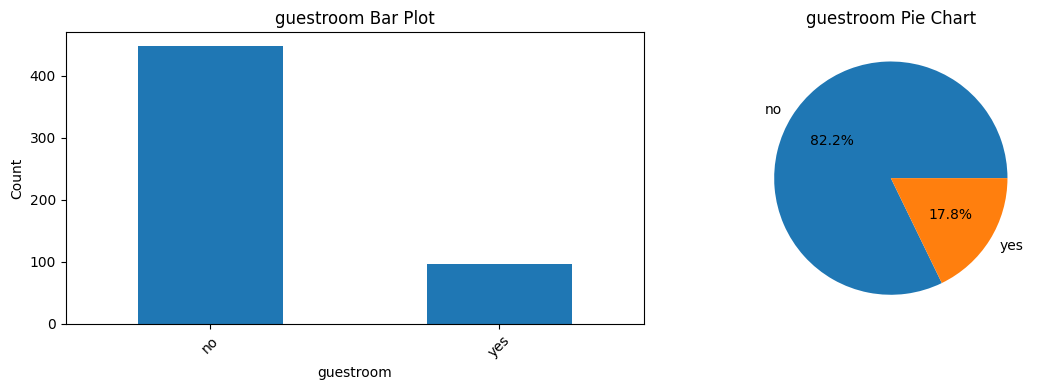

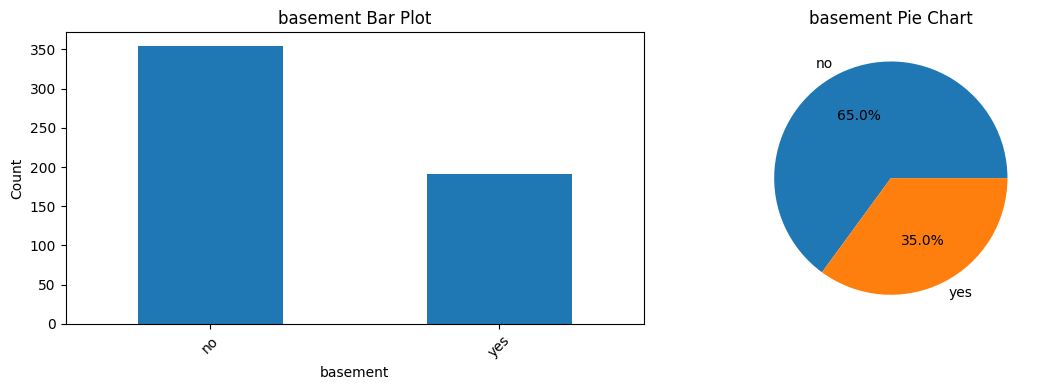

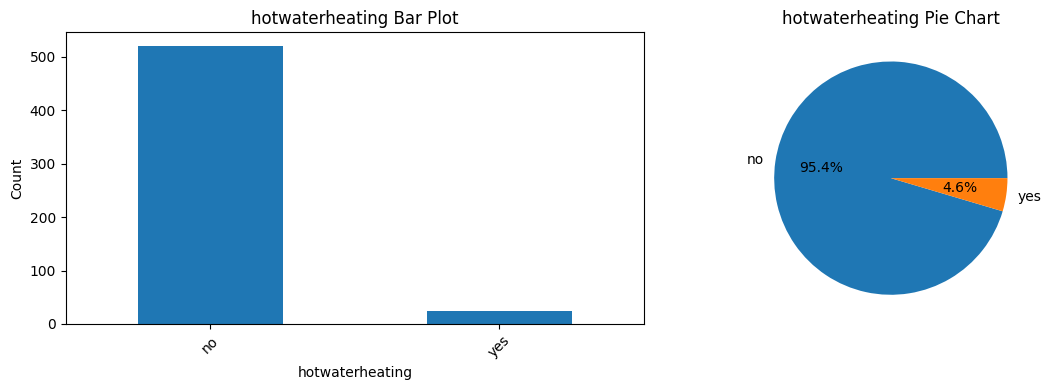

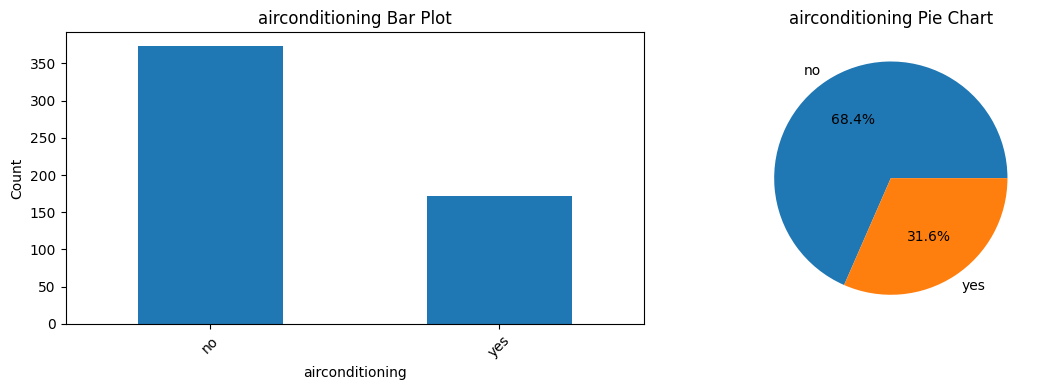

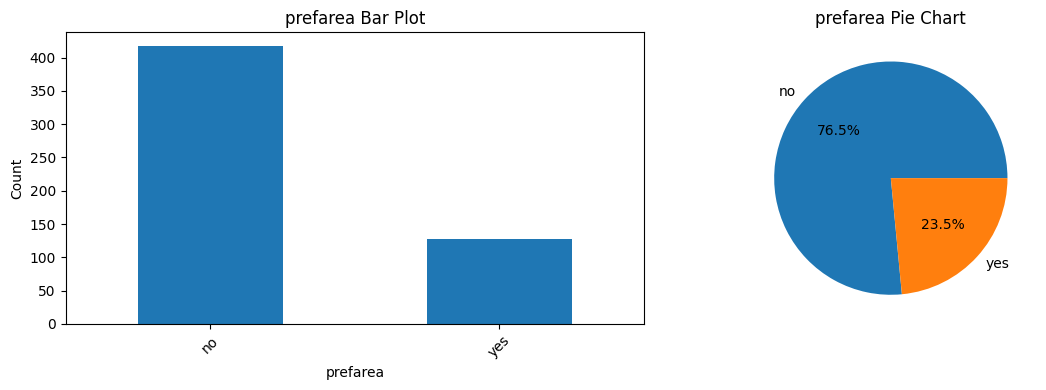

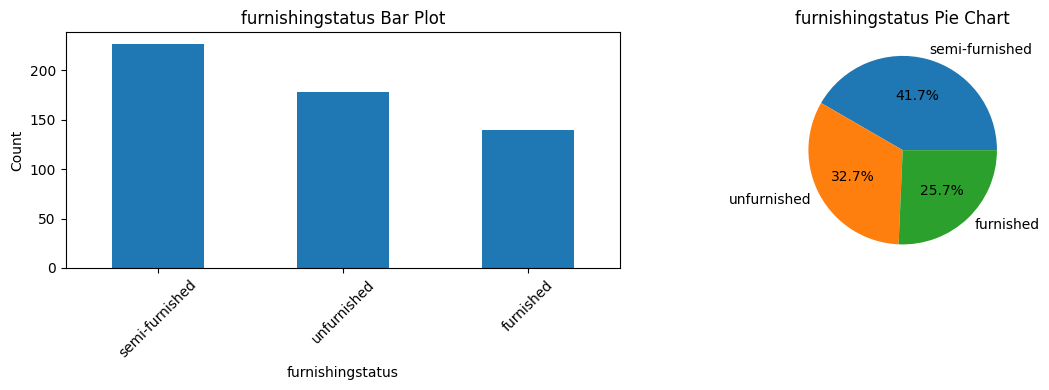

In [509]:
# Loop through each categorical column
for column in categorical_column:
    plt.figure(figsize=(12, 4))
    
    # Bar Plot (Count Plot)
    plt.subplot(1, 2, 1)
    data[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Bar Plot')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Pie Chart
    plt.subplot(1, 2, 2)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{column} Pie Chart')
    plt.ylabel('')  # Remove default ylabel
    
    plt.tight_layout()
    plt.show()

FEATURE ENGINEERING

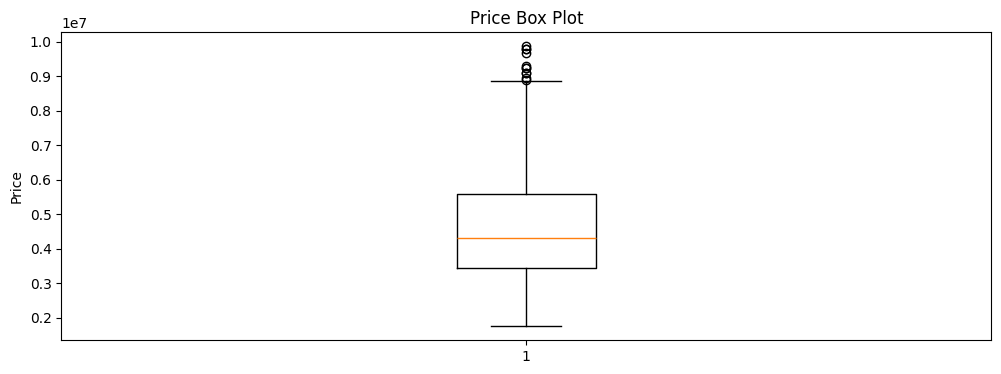

In [510]:
#Removing Outliers
data.drop(index=data[data.price>10000000].index, inplace=True)
if 'price' in numerical_column:
    plt.figure(figsize=(12, 4))
    plt.boxplot(data['price'])
    plt.title('Price Box Plot')
    plt.ylabel('Price')
    plt.show()

FEATURE SCALING

In [511]:
X= data.drop(columns='price')
y= data['price']/10000000

feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns

In [512]:
print(feature_num)
print(feature_cat)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


PREPROCESSING

In [513]:
preprocessor = make_column_transformer(
    (MinMaxScaler(), feature_num),
    (OneHotEncoder(handle_unknown='ignore'), feature_cat)
)

In [514]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [515]:
print(X_train.dtypes,y_train.dtypes)
print(X_test.dtypes)

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object float64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [516]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [517]:
print(X_train.dtype)
print(X_train.dtype)

float64
float64


In [518]:
print(X_train.shape)
print(X_test.shape)

(429, 20)
(108, 20)


In [519]:
rf_model =  RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [520]:
xg_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)

In [521]:
#errors

#mean squared error
rf_mse = mean_squared_error(y_test, rf_pred)
xg_mse = mean_squared_error(y_test, xg_pred)
print(rf_mse, xg_mse)

#r2 score
rf_r2 = r2_score(y_test, rf_pred)
xg_r2 = r2_score(y_test, xg_pred)
print(rf_r2, xg_r2 )

0.013470722613902709 0.015008276414912359
0.6451442985696566 0.6046409233475238


DEEP LEARNING MODEL

In [522]:
from keras import Sequential
from keras.layers import Input,Dense, Conv2D, GlobalMaxPooling2D, Flatten

In [523]:
model = Sequential()
model.add(Dense(25, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=500, activation='relu', name='hidden_layer1'))
model.add(Dense(units=500, activation='relu', name='hidden_layer2'))
model.add(Dense(units=1, activation='linear'))

#Display model architecture
print("\nModel Architecture:")
model.summary()



Model Architecture:


c:\Users\acer\python workspace\allvenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 25)             │           525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer1 (Dense)           │ (None, 500)            │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer2 (Dense)           │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,526 (1.01 MB)

 Trainable params: 264,526 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [524]:
#optimizer and loss for model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Early stopper to stop the epochs
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,)

In [525]:
# Visulaiztion of model
from tensorflow.keras.utils import plot_model
import pydot
import graphviz
plot_model(model,to_file='model.png',show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
